<a href="https://colab.research.google.com/github/Badugujoshna/data-science-project/blob/main/The_spam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import re

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
nltk.download('stopwords')



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [2]:
df = pd.read_csv("/content/spam (1).csv", encoding='latin-1')[['v1', 'v2']]
df.columns = ['label', 'message']


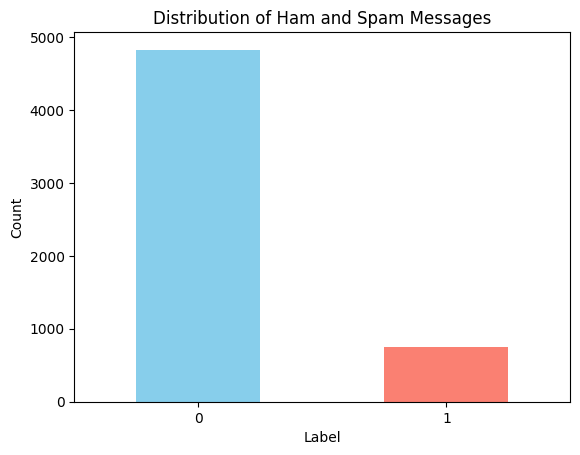

In [11]:
df['label'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title("Distribution of Ham and Spam Messages")
plt.xlabel("Label")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()



In [13]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['cleaned'])
y = df['label'].map({'ham': 0, 'spam': 1})


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [21]:
# Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

# Logistic Regression
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

ValueError: Input y contains NaN.

In [12]:
stop_words = stopwords.words('english')
stemmer = PorterStemmer()

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'\d+', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    words = text.split()
    words = [stemmer.stem(word) for word in words if word not in stop_words]
    return " ".join(words)

df['cleaned'] = df['message'].apply(preprocess_text)


In [28]:
X = df['cleaned']
y = df['label'] # Remove the mapping here

vectorizer = TfidfVectorizer()
X_vect = vectorizer.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_vect, y, test_size=0.2, random_state=42)

In [5]:
model = MultinomialNB()
model.fit(X_train, y_train)


MultinomialNB()

In [6]:
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.95695067264574

Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.98       965
           1       1.00      0.68      0.81       150

    accuracy                           0.96      1115
   macro avg       0.98      0.84      0.89      1115
weighted avg       0.96      0.96      0.95      1115



In [31]:
def evaluate(model, X_test, y_test):
    preds = model.predict(X_test)
    print("Accuracy:", accuracy_score(y_test, preds))
    print("Confusion Matrix:\n", confusion_matrix(y_test, preds))
    print("Classification Report:\n", classification_report(y_test, preds))

print("Naive Bayes:")
evaluate(nb_model, X_test, y_test)

print("Logistic Regression:")
evaluate(lr_model, X_test, y_test)

Naive Bayes:
Accuracy: 0.9659192825112107
Confusion Matrix:
 [[965   0]
 [ 38 112]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       1.00      0.75      0.85       150

    accuracy                           0.97      1115
   macro avg       0.98      0.87      0.92      1115
weighted avg       0.97      0.97      0.96      1115

Logistic Regression:
Accuracy: 0.9479820627802691
Confusion Matrix:
 [[961   4]
 [ 54  96]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97       965
           1       0.96      0.64      0.77       150

    accuracy                           0.95      1115
   macro avg       0.95      0.82      0.87      1115
weighted avg       0.95      0.95      0.94      1115



In [34]:
import joblib

joblib.dump(nb_model, "spam_classifier_model.pkl")
joblib.dump(vectorizer, "vectorizer.pkl")


['vectorizer.pkl']

In [24]:
print(y.value_counts(dropna=False))

label
NaN    5572
Name: count, dtype: int64


In [27]:
display(df.head())

,label,message,cleaned
0,0,"Go until jurong point, crazy.. Available only ...",go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entri wkli comp win fa cup final tkt st m...
3,0,U dun say so early hor... U c already then say...,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",nah dont think goe usf live around though


In [30]:
# Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

# Logistic Regression
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

LogisticRegression()

In [36]:
def predict_message(model, text):
    processed = preprocess_text(text)
    vect = vectorizer.transform([processed])
    prediction = model.predict(vect)
    return "Spam" if prediction[0] == 1 else "Ham"

# Example
predict_message(nb_model, "Win a free trip to Paris by clicking here!")


'Spam'